#### Problem Statement :
X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

#### Business Goal :
X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## 1. Import the required libraries


In [232]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use('ggplot') #Applying style to graphs
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor


## 2. Data Reading & Data Type

In [233]:
#Read the data in pandas
leads_data= pd.read_csv("Leads.csv")


## 2.1 Check Data Type

In [234]:
leads_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [235]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [236]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##   2.2  Check the shape of Dataset 

In [237]:
leads_data.shape

(9240, 37)

In [239]:
# check the dtypes of every columns now

leads_data.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [240]:
# check summary
leads_data.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 3. Missing Values - Check Null Values

In [241]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

##  3.1 Calculate Percentage of Null Values


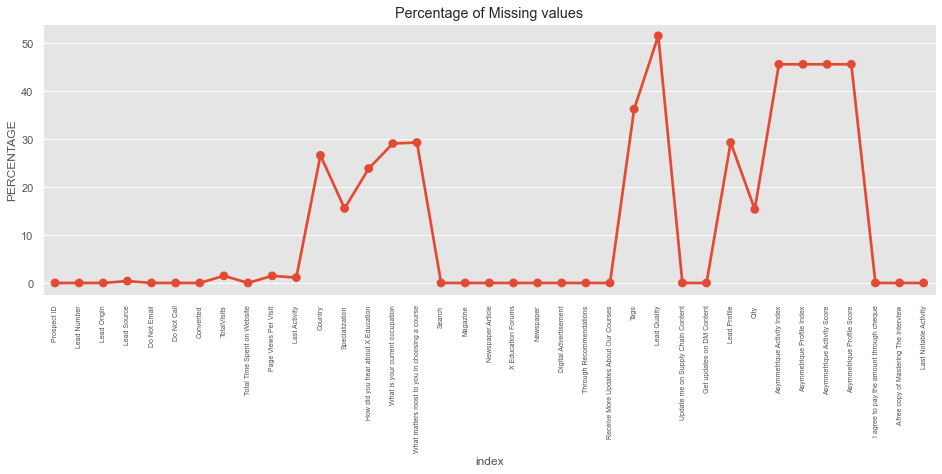

In [242]:
# Check missing data
missing = pd.DataFrame( (leads_data.isnull().sum()) * 100 / leads_data.shape[0]).reset_index()

plt.figure(figsize = (16,5))

ax = sns.pointplot('index', 0, data = missing)

plt.xticks(rotation = 90, fontsize = 7)

plt.title("Percentage of Missing values")

plt.ylabel("PERCENTAGE")

plt.show()

In [243]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [244]:
len(leads_data.columns[leads_data.isnull().any()])

17

## 3.2 Treating Missing Values

In [245]:
#  Drop Column with >40% missing Values

good_columns = set(['Lead Quality' ,
'Asymmetrique Activity Index' ,
'Asymmetrique Profile Index' ,
'Asymmetrique Activity Score' ,
'Asymmetrique Profile Score' ]) # set of "good" columns we want to keep
columns = list(leads_data.columns.values)
for col in columns:
    if col  in good_columns:
        leads_data = leads_data.drop(col, 1)               

In [246]:
leads_data.shape

(9240, 32)

In [247]:
round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [248]:
### converting all XNA values to NaN as indentified above
leads_data.replace("XNA", np.nan,inplace=True)

## Check below columns
#### Total Visits
####  Page Views Per Visit                              
####  Last Activity
####  Country
####  Specialization
####  How did you hear about X education
####  What is your current occupation
#### What matters most to you in choosing a course
#### Tags
#### Lead Profile
#### CIty

In [249]:
#checking value counts of Country column

leads_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

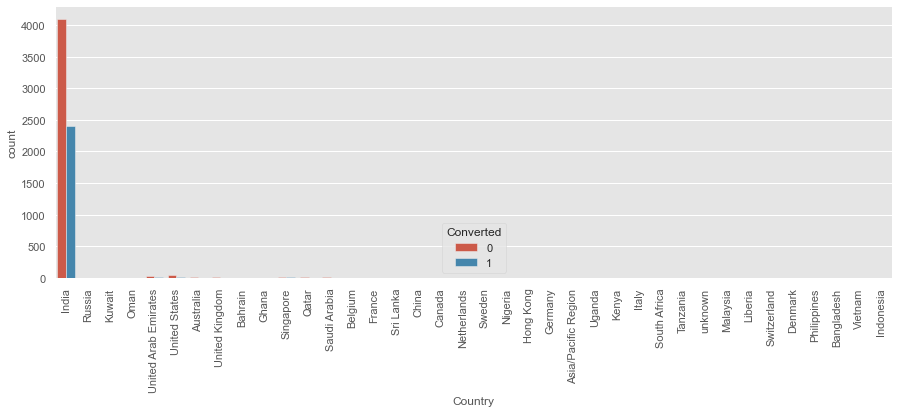

In [250]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data.Country, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [251]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

leads_data['Country'] = leads_data['Country'].replace(np.nan,'India')

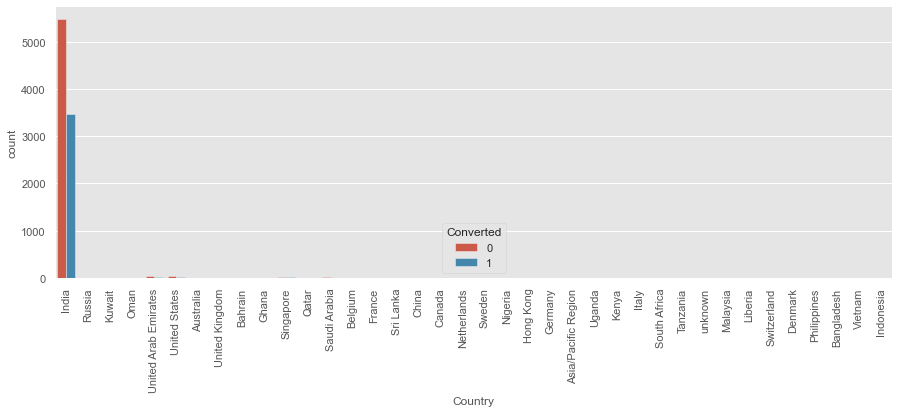

In [252]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data.Country, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [253]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [254]:
#checking value counts of "City" column

leads_data['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [255]:
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

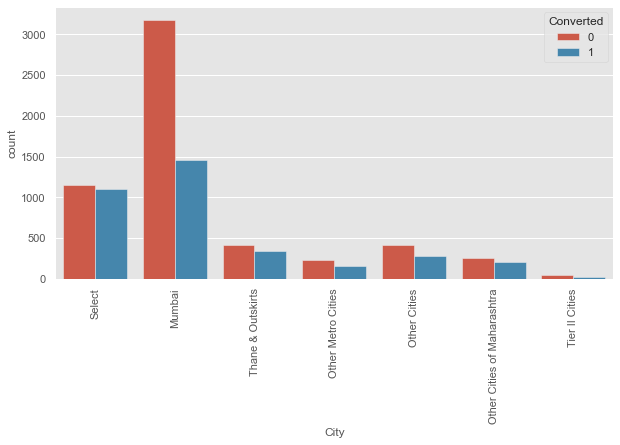

In [256]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(leads_data.City, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [257]:
#checking value counts of Specialization column

leads_data['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [258]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Specialization_Not Specified')

In [259]:
leads_data['Specialization'].value_counts()

Select                               1942
Specialization_Not Specified         1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

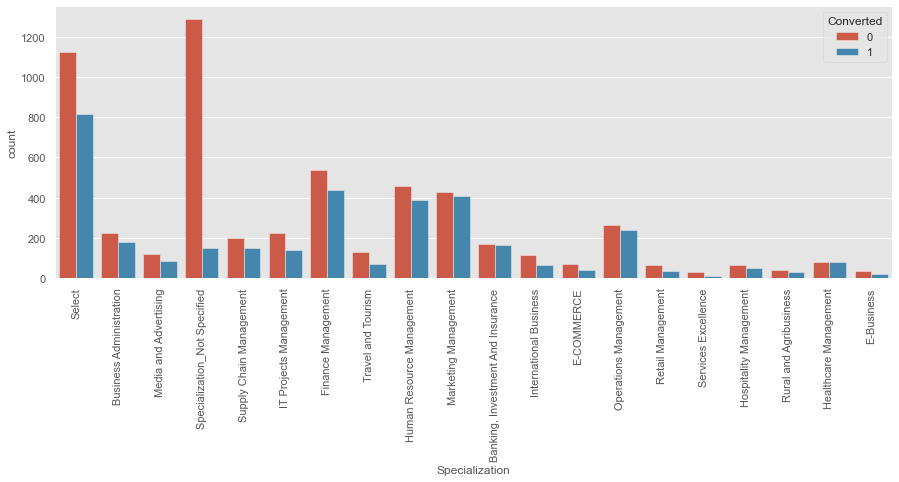

In [260]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data.Specialization, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### We see that specialization with Non Specified in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [261]:
#combining Management Specializations because they show similar trends

leads_data['Specialization'] = leads_data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

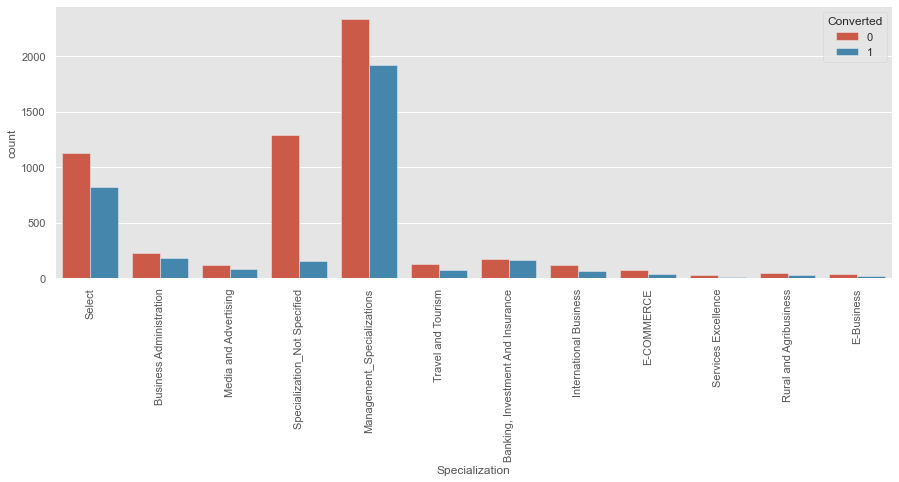

In [262]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data.Specialization, hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [263]:
#What is your current occupation

leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [264]:
#imputing Nan values with mode "Unemployed"

leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [265]:
#checking count of values
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

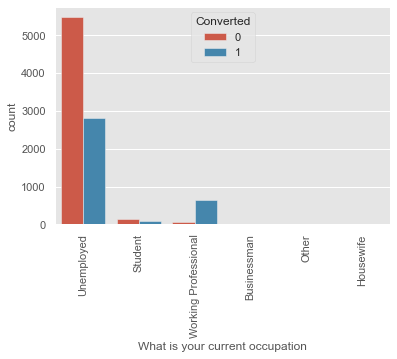

In [266]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads_data['What is your current occupation'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Working Professionals going for the course have high chances of joining it.
Unemployed leads are the most in terms of Absolute numbers.

In [267]:
#checking value counts

leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [268]:
#checking value counts

leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)


Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

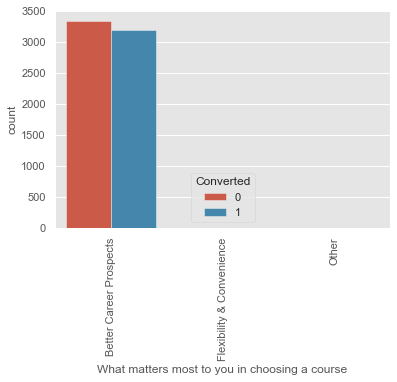

In [269]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads_data['What matters most to you in choosing a course'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [270]:
#checking value counts of variable
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [271]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [272]:
#checking value counts of Tag variable
leads_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [273]:
#replacing Nan values with "Not Specified"
leads_data['Tags'] = leads_data['Tags'].replace(np.nan,'Not Specified')

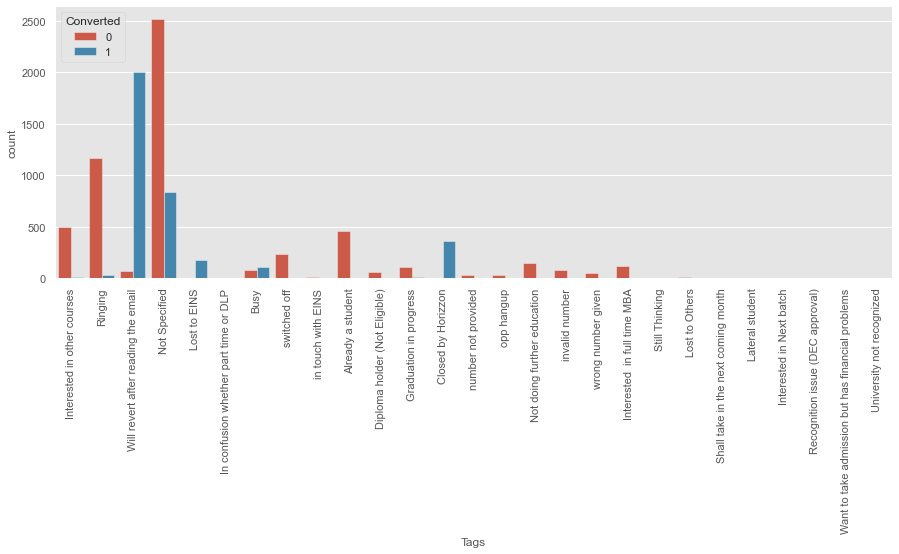

In [274]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data['Tags'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We will revert after reading email has max conversion

In [275]:
#replacing tags with low frequency with "Other Tags"
leads_data['Tags'] = leads_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_data['Tags'] = leads_data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')


In [276]:
#checking percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [277]:
#checking value counts of Lead Source column

leads_data['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [278]:
#replacing Nan Values and combining low frequency values
leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan,'Others')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace('Facebook','Social Media')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

We can group some of the lower frequency occuring labels under a common label 'Others'



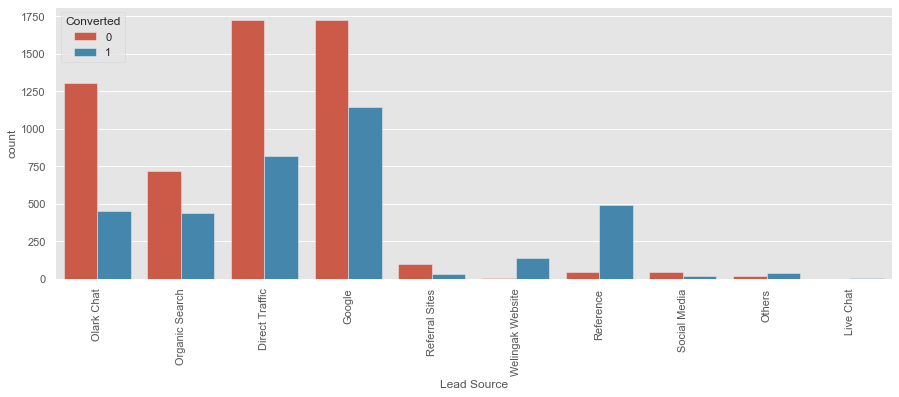

In [279]:
# visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data['Lead Source'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
Maximum number of leads are generated by Google and Direct traffic.
Conversion Rate of reference leads and leads through welingak website is high.
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [280]:
# Last Activity:

leads_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

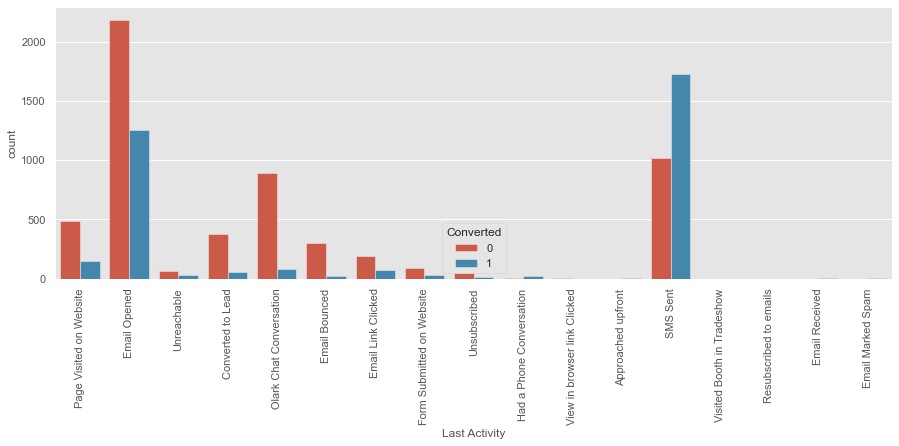

In [281]:
# visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data['Last Activity'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion

In [282]:
#replacing Nan Values and combining low frequency values

leads_data['Last Activity'] = leads_data['Last Activity'].replace(np.nan,'Others')
leads_data['Last Activity'] = leads_data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [283]:
# Last Activity:

leads_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [284]:
#Check the Null Values in All Columns:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [285]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
#leads_data = leads_data.dropna()

In [286]:
leads_data['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### SInce 'Select' value is similiar to NAN, we can drop this column as approx 7000 rows have NAN values (including selects)

In [287]:
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)



Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### SInce there is data imbalance with ~70% of the values being 'Better Career Prospects' ,  this column is insignificant and can be dropped 

In [288]:
leads_data['Lead Profile'].value_counts(dropna=False)


Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

#### SInce 'Select' value is similiar to NAN, we can drop this column as approx 6500 rows have NAN values (including selects)

In [289]:

leads_data['TotalVisits'].value_counts(dropna=False)


0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [290]:
leads_data['TotalVisits'].replace(np.nan,0.0 ,inplace=True)

In [291]:


leads_data['Page Views Per Visit'].value_counts(dropna=False)


0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
4.33        9
14.00       9
2.80        9
2.20        9
1.60        8
2.17        8
3.25        8
2.40        6
13.00       6
1.20        5
12.00       5
1.43        4
3.40        4
2.60        4
1.71        4
1.83        4
15.00       4
1.38        3
4.25        3
4.75        3
1.57        3
16.00       3
5.67        3
1.78        3
1.56        2
5.40        2
2.71        2
2.83        2
1.23        2
1.22        2
3.60        2
3.75        2
7.50        2
1.14        2
2.22        2
5.25        2
5.33        2
2.09        2
3.20        2
4.17        1
2.57  

In [292]:
leads_data['Page Views Per Visit'].replace(np.nan,0.0 ,inplace=True)

In [293]:
#Checking percentage of Null Values in All Columns:
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [294]:
#Lead Origin
leads_data['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

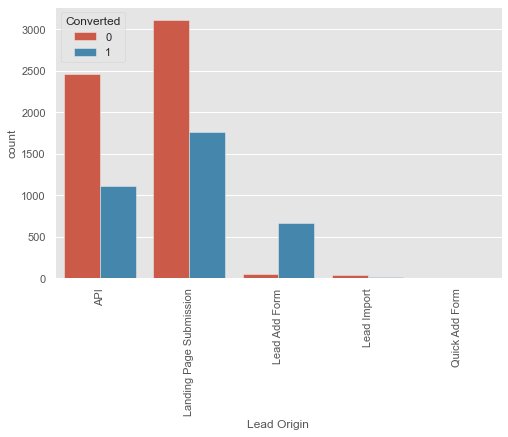

In [295]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads_data['Lead Origin'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference¶
API and Landing Page Submission bring higher number of leads as well as conversion.
Lead Add Form has a very high conversion rate but count of leads are not very high.
Lead Import and Quick Add Form get very few leads.
In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

In [296]:
#X Education Forums
leads_data['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

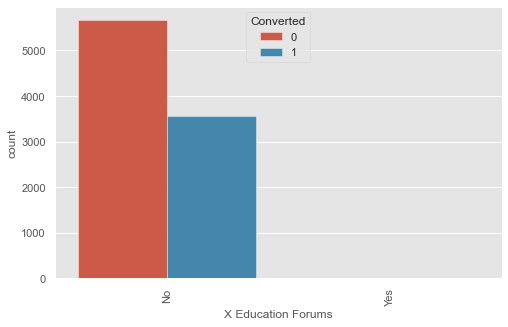

In [297]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads_data['X Education Forums'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

  "X Education Forums" column  has only Non COnverted. Not a significant column

In [298]:
#Digital Advertisement
leads_data['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

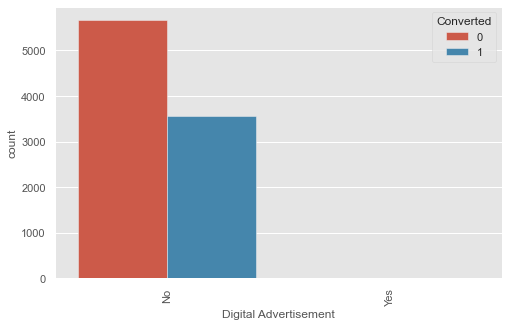

In [299]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads_data['Digital Advertisement'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

"Digital Advertisement" column  has only Non COnverted. Not a significant column

In [300]:
#Through Recommendations
leads_data['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

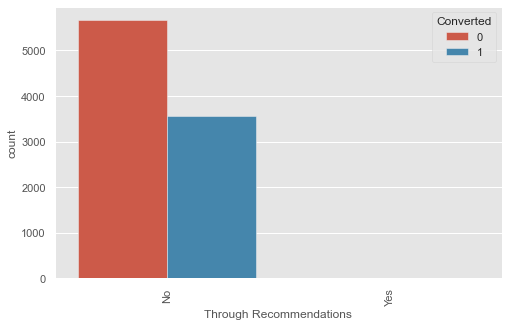

In [301]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads_data['Through Recommendations'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Through Recommendations  column has only Non COnverted. Not a significant column

In [302]:
#Through Recommendations
leads_data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

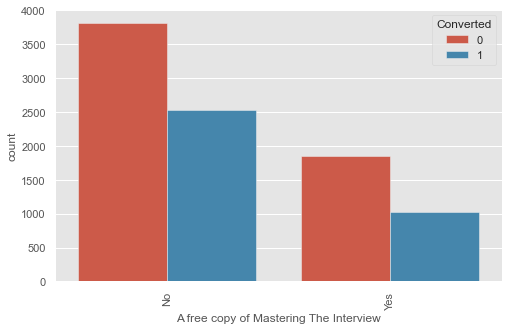

In [303]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads_data['A free copy of Mastering The Interview'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

In [304]:
#Last Notable Activity

leads_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

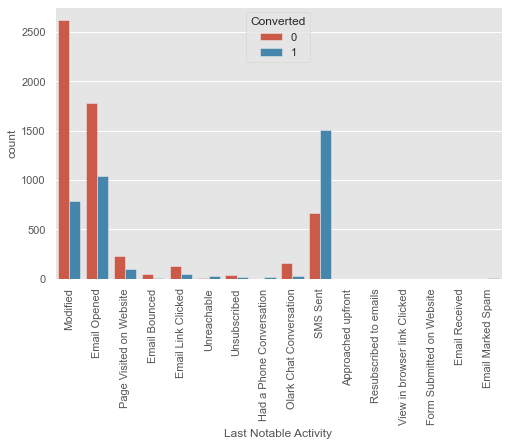

In [305]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads_data['Last Notable Activity'], hue=leads_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

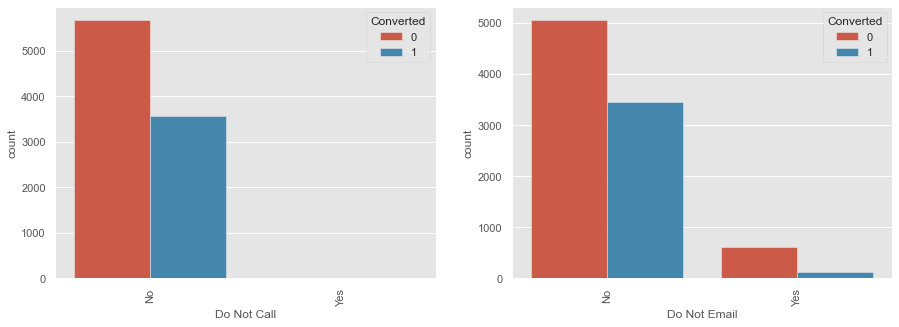

In [306]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads_data['Do Not Call'], hue=leads_data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads_data['Do Not Email'], hue=leads_data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [307]:
#checking value counts for Do Not Call
leads_data['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [308]:
#checking value counts for Do Not Email
leads_data['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

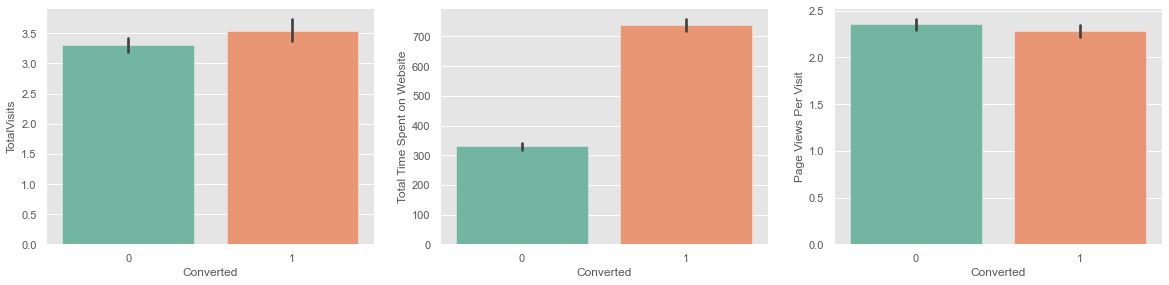

In [309]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leads_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leads_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leads_data)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

In [310]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

# IMBALANCED VARIABLES THAT CAN BE DROPPED

In [311]:
leads_data.Search.value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [312]:
leads_data.Magazine.value_counts(dropna=False)


No    9240
Name: Magazine, dtype: int64

In [313]:
leads_data['Newspaper Article'].value_counts(dropna=False)


No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [314]:
leads_data['X Education Forums'].value_counts(dropna=False)


No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [315]:
leads_data['Newspaper'].value_counts(dropna=False)


No     9239
Yes       1
Name: Newspaper, dtype: int64

In [316]:
leads_data['Digital Advertisement'].value_counts(dropna=False)


No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [317]:
leads_data['Through Recommendations'].value_counts(dropna=False)


No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [318]:
leads_data['Receive More Updates About Our Courses'].value_counts(dropna=False)


No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [319]:
leads_data['Update me on Supply Chain Content'].value_counts(dropna=False)


No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [320]:
leads_data['Get updates on DM Content'].value_counts(dropna=False)


No    9240
Name: Get updates on DM Content, dtype: int64

In [321]:
leads_data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [322]:
leads_data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [323]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque', 'How did you hear about X Education',
                    'What matters most to you in choosing a course', 'Lead Profile'])

In [324]:
#checking value counts of last Notable Activity
leads_data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [325]:
#clubbing lower frequency values

leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

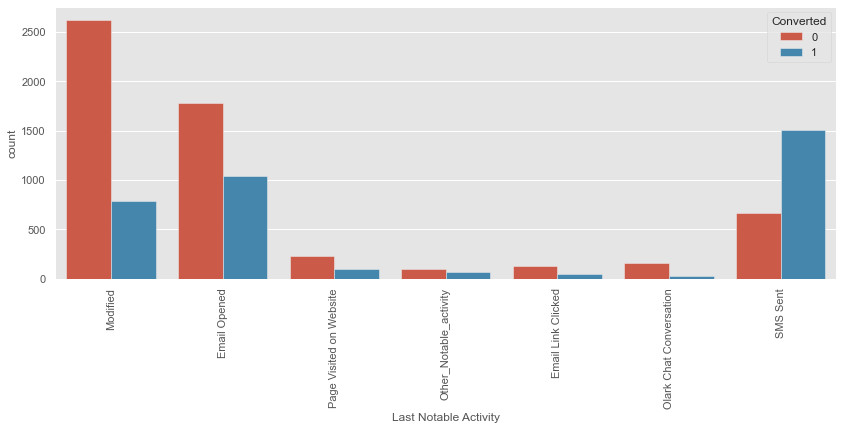

In [326]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [327]:
#checking value counts for variable

leads_data['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [328]:
#list of columns to be dropped
cols_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'How did you hear about X Education',
 'What matters most to you in choosing a course',
 'Lead Profile']

In [329]:
#dropping columns
leads_data = leads_data.drop(cols_to_drop,1)
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

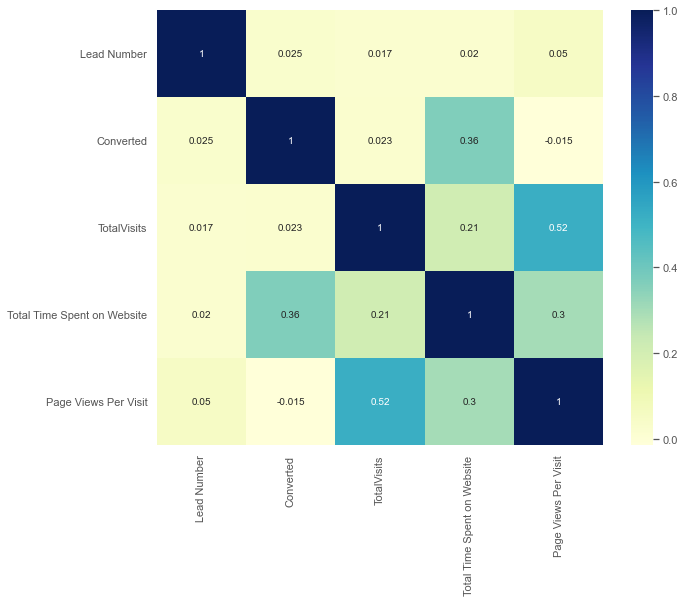

In [330]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [331]:
leads_data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

## 4. Outliers

In [332]:
## seggragating the numeric columns to see the outliers
num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
outlier_df = leads_data.select_dtypes(include=num)

In [333]:
outlier_df.shape

(9240, 5)

<Figure size 432x288 with 0 Axes>

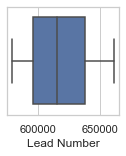

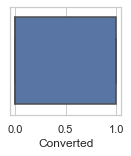

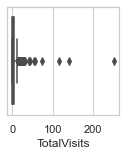

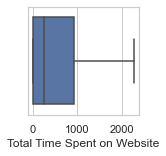

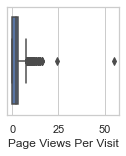

In [334]:
sns.set(style="whitegrid")

f = plt.figure()
for cols,values in outlier_df.iteritems():
    f.suptitle(cols, fontsize=16)
    f, ax = plt.subplots(1,1,figsize=(2,2))
    outlier_plot = sns.boxplot(outlier_df[cols])
    plt.show()

#### Total Visits and Pages Views per visit have outliers

In [335]:
leads_data[['Lead Number','Converted','TotalVisits', 'Total Time Spent on Website' , 'Page Views Per Visit']].describe().T


,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9240.0,3.394156,4.836682,0.0,0.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9240.0,2.327787,2.164258,0.0,0.0,2.0,3.00,55.0


In [336]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leads_data['TotalVisits'].quantile(0.99)
leads_data = leads_data[leads_data["TotalVisits"] < nn_quartile_total_visits]
leads_data["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.134777
std         2.939096
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [337]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.134777,486.074609,2.299531
std,23413.72193,0.486718,2.939096,547.856302,2.065837
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,0.000000,10.000000,0.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [338]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leads_data['Page Views Per Visit'].quantile(0.99)
leads_data = leads_data[leads_data["Page Views Per Visit"] < nn_quartile_page_visits]
leads_data["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.196036
std         1.843445
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [339]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leads_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.041644,483.133016,2.196036
std,23372.383121,0.486644,2.826553,547.420675,1.843445
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,0.000000,7.000000,0.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [340]:
leads_data.shape

(9029, 16)

In [341]:
# Determine the percentage of data retained

num_data = round(100*(len(leads_data)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

##### Check datatypes of columns and modify them appropriately


In [342]:
#Check the float type columns
leads_data.select_dtypes(include='float64').columns

Index(['TotalVisits', 'Page Views Per Visit'], dtype='object')

In [343]:
#Converting these count columns to int64
ColumnToConvert = ['TotalVisits', 'Page Views Per Visit' ]
leads_data.loc[:,ColumnToConvert]=leads_data.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [344]:
#Check the object type columns
ColumnToConvert = list(leads_data.select_dtypes(include='object').columns)

In [345]:
leads_data.loc[:,ColumnToConvert]=leads_data.loc[:,ColumnToConvert].apply(lambda col: col.astype('str',errors='ignore'))


In [346]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Select,Unemployed,Interested in other courses,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5,674,2,Email Opened,Select,Unemployed,Ringing,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Select,Unemployed,Will revert after reading the email,Mumbai,No,Modified


## 5. Checking for imbalance in Target

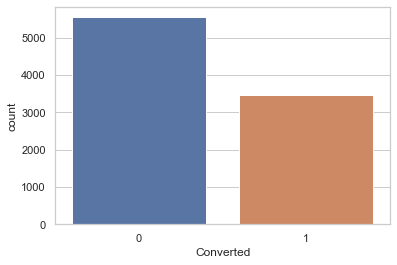

In [347]:
Target_count= sns.countplot("Converted",data =leads_data)


In [348]:
leads_data['Converted'].value_counts(normalize=True)*100

0    61.490752
1    38.509248
Name: Converted, dtype: float64

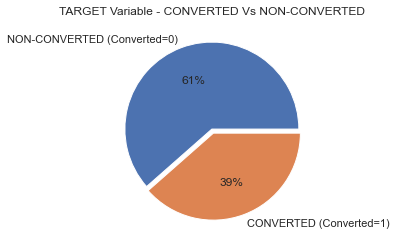

In [349]:
plt.pie(leads_data['Converted'].value_counts(normalize=True)*100,labels=['NON-CONVERTED (Converted=0)','CONVERTED (Converted=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - CONVERTED Vs NON-CONVERTED')
plt.show()

There is no imbalance between people who converted and who didn't convert

In [350]:
#getting a list of categorical columns

cat_cols= leads_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [351]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [352]:
dummy = pd.get_dummies(leads_data[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads_data = pd.concat([leads_data,dummy],1)

In [353]:
dummy = pd.get_dummies(leads_data['Specialization'], prefix  = 'Specialization',drop_first=True)


In [354]:
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [355]:
dummy = pd.get_dummies(leads_data['Lead Source'], prefix  = 'Lead Source' ,drop_first=True)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [356]:
dummy = pd.get_dummies(leads_data['Last Activity'], prefix  = 'Last Activity',drop_first=True)
leads_data = pd.concat([leads_data, dummy], axis = 1)
dummy = pd.get_dummies(leads_data['Last Notable Activity'], prefix  = 'Last Notable Activity', drop_first=True)
leads_data = pd.concat([leads_data, dummy], axis = 1)
dummy = pd.get_dummies(leads_data['Tags'], prefix  = 'Tags',drop_first=True)
leads_data = pd.concat([leads_data, dummy], axis = 1)
#dropping the original columns after dummy variable creation

leads_data.drop(cat_cols,1,inplace = True)
leads_data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,660737,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,660728,0,5,674,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,660727,1,2,1532,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,660719,0,1,305,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,660681,1,2,1428,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [357]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Number                                           9029 non-null   int64
 1   Converted                                             9029 non-null   int64
 2   TotalVisits                                           9029 non-null   int32
 3   Total Time Spent on Website                           9029 non-null   int64
 4   Page Views Per Visit                                  9029 non-null   int32
 5   Lead Origin_Landing Page Submission                   9029 non-null   uint8
 6   Lead Origin_Lead Add Form                             9029 non-null   uint8
 7   Lead Origin_Lead Import                               9029 non-null   uint8
 8   Lead Origin_Quick Add Form                            9029 non-null   uint8
 9

## 5.1 Bivariate Analysis

In [366]:
Target0 =leads_data[leads_data.Converted==0]
Target1=leads_data[leads_data.Converted==1]

In [367]:
# function for scatter plot for continuous variables
def plotbivar(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=Target0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=Target1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

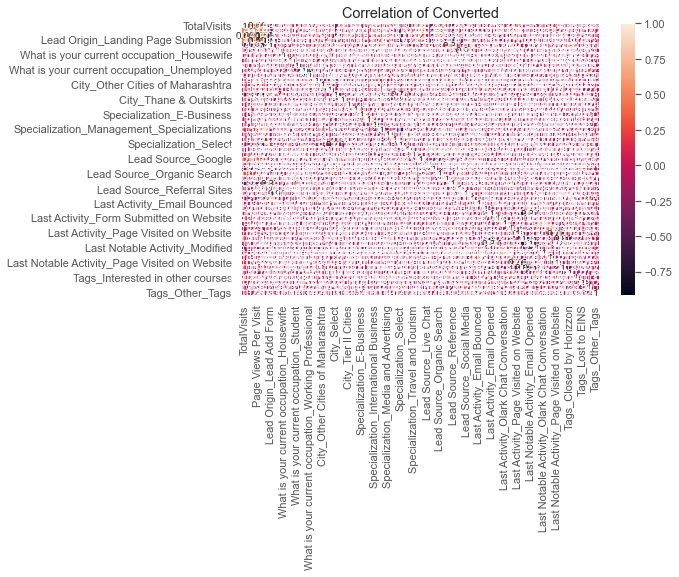

In [368]:
# plotting heatmap where TARGET = 1

cols = ['TotalVisits',
'Total Time Spent on Website',
'Page Views Per Visit',
'Lead Origin_Landing Page Submission',
'Lead Origin_Lead Add Form',
'Lead Origin_Lead Import',
'What is your current occupation_Housewife',
'What is your current occupation_Other',
'What is your current occupation_Student',
'What is your current occupation_Unemployed',
'What is your current occupation_Working Professional',
'City_Other Cities',
'City_Other Cities of Maharashtra',
'City_Other Metro Cities',
'City_Select',
'City_Thane & Outskirts',
'City_Tier II Cities',
'Specialization_Business Administration',
'Specialization_E-Business',
'Specialization_E-COMMERCE',
'Specialization_International Business',
'Specialization_Management_Specializations',
'Specialization_Media and Advertising',
'Specialization_Rural and Agribusiness',
'Specialization_Select',
'Specialization_Services Excellence',
'Specialization_Travel and Tourism',
'Lead Source_Google',
'Lead Source_Live Chat',
'Lead Source_Olark Chat',
'Lead Source_Organic Search',
'Lead Source_Others',
'Lead Source_Reference',
'Lead Source_Referral Sites',
'Lead Source_Social Media',
'Lead Source_Welingak Website',
'Last Activity_Email Bounced',
'Last Activity_Email Link Clicked',
'Last Activity_Email Opened',
'Last Activity_Form Submitted on Website',
'Last Activity_Olark Chat Conversation',
'Last Activity_Others',
'Last Activity_Page Visited on Website',
'Last Activity_SMS Sent',
'Last Notable Activity_Email Opened',
'Last Notable Activity_Modified',
'Last Notable Activity_Olark Chat Conversation',
'Last Notable Activity_Other_Notable_activity',
'Last Notable Activity_Page Visited on Website',
'Last Notable Activity_SMS Sent',
'Tags_Closed by Horizzon',
'Tags_Interested in other courses',
'Tags_Lost to EINS',
'Tags_Not Specified',
'Tags_Other_Tags']
cor = Target1[cols].corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor, annot = True)
plt.title('Correlation of Converted')
plt.show()

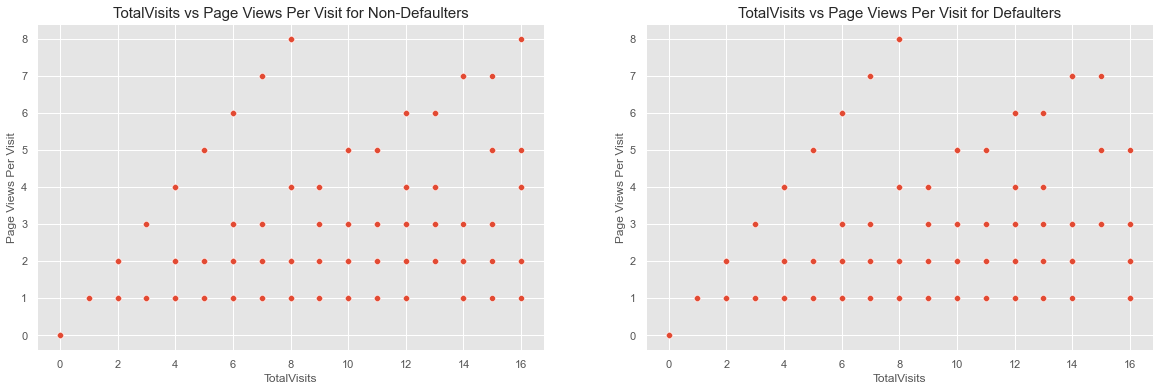

In [369]:
plotbivar('TotalVisits','Page Views Per Visit')

In [370]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads_data['Converted']

y.head()

X=leads_data.drop('Converted', axis=1)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [372]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6320 entries, 5493 to 5760
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Lead Number                                           6320 non-null   int64
 1   TotalVisits                                           6320 non-null   int32
 2   Total Time Spent on Website                           6320 non-null   int64
 3   Page Views Per Visit                                  6320 non-null   int32
 4   Lead Origin_Landing Page Submission                   6320 non-null   uint8
 5   Lead Origin_Lead Add Form                             6320 non-null   uint8
 6   Lead Origin_Lead Import                               6320 non-null   uint8
 7   Lead Origin_Quick Add Form                            6320 non-null   uint8
 8   What is your current occupation_Housewife             6320 non-null   uint8

## 6 Model Building

In [373]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
5493,-0.413373,2,-0.708153,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8064,-1.262136,3,-0.711823,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4716,-0.119375,3,-0.471434,3,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9117,-1.590400,0,-0.884316,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2402,0.832272,6,0.704822,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Model Building using Stats Model & RFE:

In [374]:
import statsmodels.api as sm


In [375]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [376]:
rfe.support_


array([False, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [377]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 3),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 3),
 ('What is your current occupation_Housewife', False, 2),
 ('What is your current occupation_Other', False, 3),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', False, 2),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 2),
 ('City_Other Cities of Maharashtra', False, 3),
 ('City_Other Metro Cities', False, 2),
 ('City_Select', False, 2),
 ('City_Thane & Outskirts', False, 3),
 ('City_Tier II Cities', False, 2),
 ('Specialization_Business Administration', False, 3),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International 

In [378]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'What is your current occupation_Working Professional',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Select', 'Specialization_Specialization_Not Specified',
       'Specialization_Travel and Tourism', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Spec

In [379]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Quick Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Select', 'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Last Activity_Email Link Clicked', 'Last Activity_Others',
       'Last Activity_Page Visit

In [380]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[col])
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm1.fit() 
    print(res.summary())
    return res

In [381]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [382]:
#BUILDING MODEL #1
build_model(col)
get_vif(col)
    


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1145.1
Date:                Mon, 14 Nov 2022   Deviance:                       2290.2
Time:                        23:29:48   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6199
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [383]:
#removing Lead Origin_Quick Add Form
col=col.drop('Lead Origin_Lead Add Form')

In [384]:
#BUILDING MODEL #2
build_model(col)
get_vif(col)
    


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6290
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1145.7
Date:                Mon, 14 Nov 2022   Deviance:                       2291.4
Time:                        23:29:49   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6198
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [385]:
col=col.drop('Tags_Not Specified')

In [386]:
#BUILDING MODEL #3
build_model(col)
get_vif(col)
    

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1147.0
Date:                Mon, 14 Nov 2022   Deviance:                       2293.9
Time:                        23:29:51   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6196
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [387]:
#removing 'Last Notable Activity_SMS Sent
col=col.drop('Last Notable Activity_SMS Sent')

In [388]:
#BUILDING MODEL #4
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.6
Date:                Mon, 14 Nov 2022   Deviance:                       2309.2
Time:                        23:29:53   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6187
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [389]:
col=col.drop('Lead Origin_Lead Import')

In [390]:
#BUILDING MODEL #5
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.7
Date:                Mon, 14 Nov 2022   Deviance:                       2309.3
Time:                        23:29:54   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6187
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [391]:
col=col.drop('Specialization_E-COMMERCE')

In [392]:
#BUILDING MODEL #6
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.9
Date:                Mon, 14 Nov 2022   Deviance:                       2309.9
Time:                        23:29:57   Pearson chi2:                 1.10e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6187
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [393]:
col=col.drop('Specialization_E-Business')

In [394]:
#BUILDING MODEL #7
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1155.2
Date:                Mon, 14 Nov 2022   Deviance:                       2310.4
Time:                        23:29:59   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6186
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [395]:
col=col.drop('What is your current occupation_Working Professional')

In [396]:
#BUILDING MODEL #8
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1157.0
Date:                Mon, 14 Nov 2022   Deviance:                       2314.0
Time:                        23:30:01   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6184
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [397]:
col=col.drop('Specialization_Travel and Tourism')

In [398]:
#BUILDING MODEL #9
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1157.9
Date:                Mon, 14 Nov 2022   Deviance:                       2315.7
Time:                        23:30:04   Pearson chi2:                 1.13e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6183
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [399]:
col=col.drop('Lead Source_Reference')

In [400]:
#BUILDING MODEL #10
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1158.6
Date:                Mon, 14 Nov 2022   Deviance:                       2317.2
Time:                        23:30:06   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6182
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [401]:
col=col.drop('Last Activity_Email Opened')

In [402]:
#BUILDING MODEL #11
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.1
Date:                Mon, 14 Nov 2022   Deviance:                       2318.2
Time:                        23:30:08   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6182
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [403]:
col=col.drop('Last Activity_Olark Chat Conversation')

In [404]:
#BUILDING MODEL #12
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.5
Date:                Mon, 14 Nov 2022   Deviance:                       2319.0
Time:                        23:30:10   Pearson chi2:                 1.15e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6181
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [405]:
col=col.drop('Last Activity_Form Submitted on Website')

In [406]:
#BUILDING MODEL #13
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1161.3
Date:                Mon, 14 Nov 2022   Deviance:                       2322.5
Time:                        23:30:11   Pearson chi2:                 1.12e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6179
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [407]:
col=col.drop('Specialization_Select')

In [408]:
#BUILDING MODEL #14
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1162.9
Date:                Mon, 14 Nov 2022   Deviance:                       2325.9
Time:                        23:30:12   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6177
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [409]:
col=col.drop('Last Notable Activity_Other_Notable_activity')

In [410]:
#BUILDING MODEL #15
build_model(col)
get_vif(col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.5
Date:                Mon, 14 Nov 2022   Deviance:                       2327.0
Time:                        23:30:14   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6176
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [411]:
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1163.5
Date:                Mon, 14 Nov 2022   Deviance:                       2327.0
Time:                        23:30:15   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6176
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.1154      0.148     -0.778      0.437      -0.406       0.175
Total Time Spent on Website                       1.0137      0.062     16.438      0.000       0.893       1.135
Lead Origin_Landing Page Submission              -1.5838      0.151    -10.457      0.000      -1.881      -1.287
Specialization_Specialization_Not Specified      -2.0023      0.168    -11.895      0.000      -2.332      -1.672
Lead Source_Olark Chat                            0.8829      0.174      5.076      0.000       0.542       1.224
Lead Source_Others                                1.3026      0.611      2.131      0.033       0.105       2.501
Lead Source_Welingak Website                      4.1831      0.744      5.622      0.000       2.725       5.641
Last Activity_Email Bounced                      -0.8574      0.432     -1.983      0.047      -1.705      -0.010
Last Activity_SMS Sent                            1.9337      0.120     16.109      0.000       1.698       2.169
Last Notable Activity_Modified                   -1.6347      0.131    -12.509      0.000      -1.891      -1.379
Last Notable Activity_Olark Chat Conversation    -1.5599      0.464     -3.359      0.001      -2.470      -0.650
Tags_Closed by Horizzon                           7.1708      1.015      7.065      0.000       5.182       9.160
Tags_Interested in other courses                 -3.0659      0.449     -6.826      0.000      -3.946      -2.186
Tags_Lost to EINS                                 5.7095      0.613      9.320      0.000       4.509       6.910
Tags_Other_Tags                                  -3.1373      0.248    -12.644      0.000      -3.624      -2.651
Tags_Ringing                                     -3.6525      0.239    -15.258      0.000      -4.122      -3.183
Tags_Will revert after reading the email          4.2381      0.188     22.539      0.000       3.870       4.607
=================================================================================================================
"""

VIF is under 5 so we retain all variables

In [412]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.000451
8064    0.002184
4716    0.132593
9117    0.039360
2402    0.962794
1796    0.022622
1120    0.022622
253     0.088844
1491    0.122917
2004    0.977864
dtype: float64

In [413]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([4.50654865e-04, 2.18436763e-03, 1.32593183e-01, 3.93604269e-02,
       9.62793877e-01, 2.26217253e-02, 2.26217253e-02, 8.88436133e-02,
       1.22916694e-01, 9.77864047e-01])

In [414]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.000451,5493
1,0,0.002184,8064
2,0,0.132593,4716
3,0,0.039360,9117
4,1,0.962794,2402


In [415]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.000451,5493,0
1,0,0.002184,8064,0
2,0,0.132593,4716,0
3,0,0.039360,9117,0
4,1,0.962794,2402,1


In [416]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3759  150]
 [ 309 2102]]


In [417]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9273734177215189


In [418]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [419]:
TP / float(TP+FN)

0.8718374118622978

In [420]:
TN / float(TN+FP)


0.9616270145817345

In [421]:
print(FP/ float(TN+FP))

0.03837298541826554


In [422]:
print (TP / float(TP+FP))

0.933392539964476


In [423]:
print (TN / float(TN+ FN))

0.9240412979351033


In [424]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [425]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

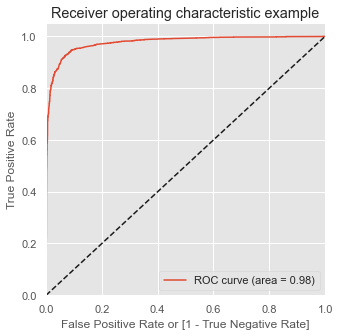

In [426]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [427]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000451,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002184,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.132593,4716,0,1,1,0,0,0,0,0,0,0,0
3,0,0.039360,9117,0,1,0,0,0,0,0,0,0,0,0
4,1,0.962794,2402,1,1,1,1,1,1,1,1,1,1,1


In [428]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.848101  0.974285  0.770274
0.2   0.2  0.918354  0.949399  0.899207
0.3   0.3  0.925000  0.937785  0.917114
0.4   0.4  0.929272  0.917876  0.936301
0.5   0.5  0.927373  0.871837  0.961627
0.6   0.6  0.925633  0.853173  0.970325
0.7   0.7  0.921044  0.833264  0.975185
0.8   0.8  0.914873  0.805060  0.982604
0.9   0.9  0.888449  0.724181  0.989767


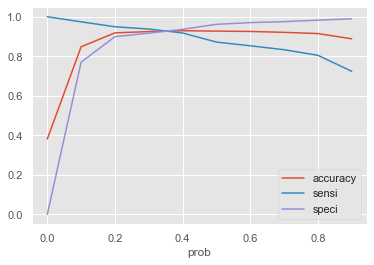

In [429]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [430]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.000451,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.002184,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.132593,4716,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.039360,9117,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.962794,2402,1,1,1,1,1,1,1,1,1,1,1,1


In [431]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.000451,5493,0,0
1,0,0.002184,8064,0,0
2,0,0.132593,4716,0,13
3,0,0.039360,9117,0,4
4,1,0.962794,2402,1,96


In [432]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.925

In [433]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3585,  324],
       [ 150, 2261]], dtype=int64)

In [434]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0]

In [435]:
TP / float(TP+FN)


0.9377851513894649

In [436]:
TN / float(TN+FP)

0.9171143514965464

In [437]:
print(FP/ float(TN+FP))
# Calculate False Postive Rate - predicting conversion when customer does not have convert

0.08288564850345356


In [438]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8746615087040619


In [439]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9598393574297188


In [440]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3585,  324],
       [ 150, 2261]], dtype=int64)

In [441]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8746615087040619

In [442]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9377851513894649

In [443]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8746615087040619

In [444]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9377851513894649

In [445]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

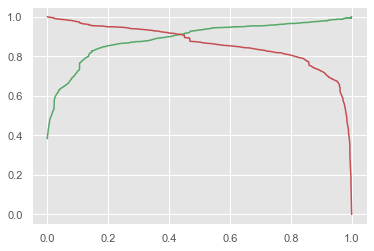

In [446]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [447]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,...,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
4664,-0.102048,0,-0.884316,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5394,-0.382986,4,-0.583371,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1595,1.135537,4,1.264507,4,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2111,0.948389,7,0.073571,7,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9182,-1.608977,0,-0.884316,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [448]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Specialization_Specialization_Not Specified,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
4664,-0.884316,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5394,-0.583371,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1595,1.264507,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2111,0.073571,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9182,-0.884316,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0


In [449]:
X_test_sm = sm.add_constant(X_test)

In [450]:
y_test_pred = res.predict(X_test_sm)


In [451]:
y_test_pred[:10]

4664    0.467809
5394    0.188680
1595    0.994051
2111    0.164561
9182    0.048924
1055    0.453314
541     0.092690
446     0.971396
3728    0.015371
4249    0.014955
dtype: float64

In [452]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [453]:
# Let's see the head
y_pred_1.head()

,0
4664,0.467809
5394,0.188680
1595,0.994051
2111,0.164561
9182,0.048924


In [454]:
y_test_df = pd.DataFrame(y_test)

In [455]:
y_test_df['Prospect ID'] = y_test_df.index

In [456]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [457]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [458]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,4664,0.467809
1,0,5394,0.188680
2,1,1595,0.994051
3,0,2111,0.164561
4,0,9182,0.048924


In [459]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [460]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,4664,0.467809
1,0,5394,0.188680
2,1,1595,0.994051
3,0,2111,0.164561
4,0,9182,0.048924


In [461]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [462]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4664,0,0.467809,47
1,5394,0,0.188680,19
2,1595,1,0.994051,99
3,2111,0,0.164561,16
4,9182,0,0.048924,5


In [463]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.45 else 0)

In [464]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4664,0,0.467809,47,1
1,5394,0,0.188680,19,0
2,1595,1,0.994051,99,1
3,2111,0,0.164561,16,0
4,9182,0,0.048924,5,0


In [465]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9390919158361019

In [466]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1562,   81],
       [  84,  982]], dtype=int64)

In [467]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [468]:
TP / float(TP+FN)

0.9212007504690432

In [469]:
# Let us calculate specificity
TN / float(TN+FP)

0.9506999391357274

In [470]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9238005644402634

In [471]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9212007504690432